# Plot DOS and PDOS

Fermi Energy = -2.344 eV


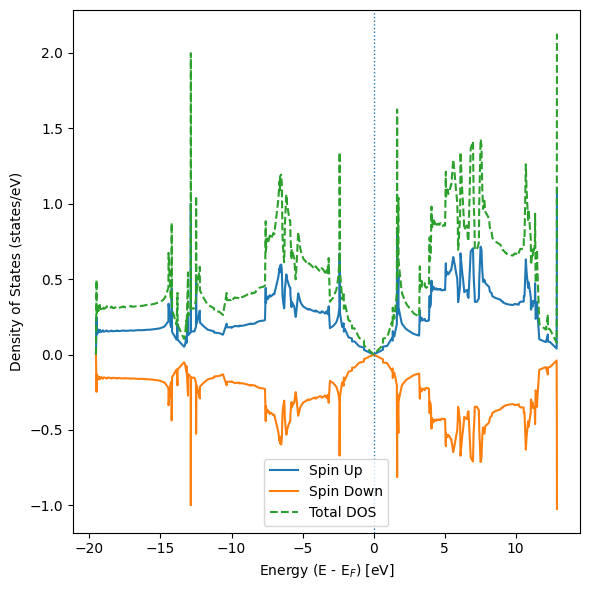

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re #regex import

# put filename
filename = "graphene.dos"

# Read the fermi energy
with open(filename, 'r') as f:
    first_line = f.readline()

# Extract EFermi using regex
match = re.search(r'EFermi\s*=\s*([-\d.]+)', first_line)
if match:
    efermi = float(match.group(1))
    print(f"Fermi Energy = {efermi} eV")
else:
    raise ValueError("Fermi energy not found in file!")

#load the dos data
data = np.loadtxt(filename, comments='#')

energy = data[:, 0]
dos_up = data[:, 1]
dos_down = data[:, 2]

# Shift energy relative to EF
energy_shifted = energy - efermi

# Total DOS
dos_total = dos_up + dos_down

# Make spin-down negative
dos_down_negative = -dos_down

# plot
plt.figure(figsize=(6, 6))

plt.plot(energy_shifted, dos_up, label='Spin Up')
plt.plot(energy_shifted, dos_down_negative, label='Spin Down')
plt.plot(energy_shifted, dos_total, linestyle='--', label='Total DOS')

# Fermi level line
plt.axvline(0, linestyle=':', linewidth=1)

plt.xlabel("Energy (E - E$_F$) [eV]")
plt.ylabel("Density of States (states/eV)")
plt.legend()
plt.tight_layout()
plt.show()

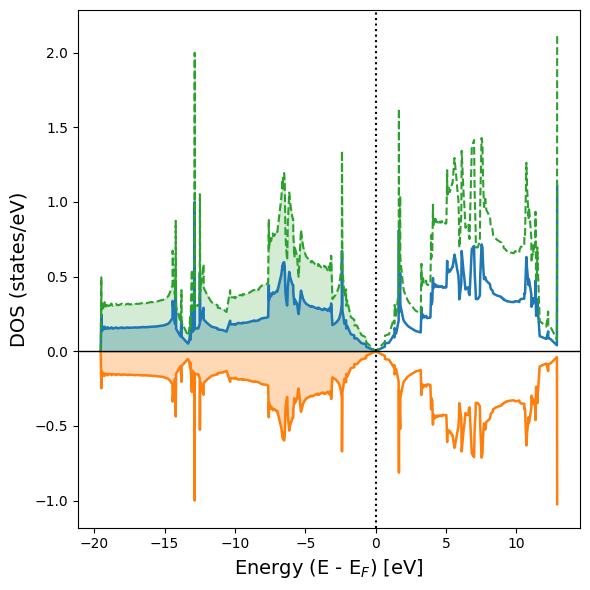

In [2]:
plt.figure(figsize=(6,6))

# spin up
line_up, = plt.plot(energy_shifted, dos_up, linewidth=1.8)
plt.fill_between(
    energy_shifted,
    dos_up,
    0,
    where=(energy_shifted <= 0),
    color=line_up.get_color(),
    alpha=0.3
)

# spin down
line_dn, = plt.plot(energy_shifted, dos_down_negative, linewidth=1.8)
plt.fill_between(
    energy_shifted,
    dos_down_negative,
    0,
    where=(energy_shifted <= 0),
    color=line_dn.get_color(),
    alpha=0.3
)

# total dos
line_tot, = plt.plot(energy_shifted, dos_total, linestyle='--', linewidth=1.5)
plt.fill_between(
    energy_shifted,
    dos_total,
    0,
    where=(energy_shifted <= 0),
    color=line_tot.get_color(),
    alpha=0.2
)

# reference lines
plt.axhline(0, color='black', linewidth=1)      # y = 0
plt.axvline(0, color='black', linestyle=':')    # Fermi level

plt.xlabel("Energy (E - E$_F$) [eV]", fontsize=14)
plt.ylabel("DOS (states/eV)", fontsize=14)

plt.tight_layout()
plt.show()

Fermi Energy = -2.344


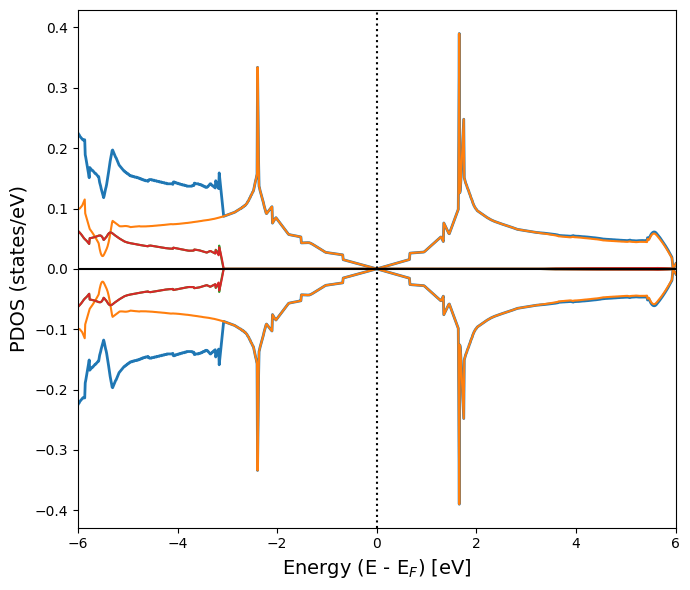

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import re

# ====== Files ======
dos_file = "graphene.dos"
pdos_file = "graphene.pdos_atm#2(C)_wfc#2(p)"

# ====== Read Fermi energy ======
with open(dos_file, 'r') as f:
    first_line = f.readline()

match = re.search(r'EFermi\s*=\s*([-\d.]+)', first_line)
if match:
    efermi = float(match.group(1))
    print("Fermi Energy =", efermi)
else:
    raise ValueError("Fermi energy not found!")

# Load PDOS
data = np.loadtxt(pdos_file)

energy = data[:, 0] - efermi

ldos_up   = data[:, 1]
ldos_down = data[:, 2]

# Correct orbital order: pz px py
pz_up = data[:, 3]
pz_down = data[:, 4]

px_up = data[:, 5]
px_down = data[:, 6]

py_up = data[:, 7]
py_down = data[:, 8]

# Make spin-down negative
ldos_down = -ldos_down
pz_down = -pz_down
px_down = -px_down
py_down = -py_down

#  Plot
plt.figure(figsize=(7,6))

#  Total p
line_tot, = plt.plot(energy, ldos_up, linewidth=2)
plt.plot(energy, ldos_down, linewidth=2, color=line_tot.get_color())

#  pz
line_pz, = plt.plot(energy, pz_up, linewidth=1.5)
plt.plot(energy, pz_down, linewidth=1.5, color=line_pz.get_color())

#  px
line_px, = plt.plot(energy, px_up, linewidth=1.5)
plt.plot(energy, px_down, linewidth=1.5, color=line_px.get_color())

#  py
line_py, = plt.plot(energy, py_up, linewidth=1.5)
plt.plot(energy, py_down, linewidth=1.5, color=line_py.get_color())

# Reference lines
plt.axhline(0, color='black')
plt.axvline(0, linestyle=':', color='black')

plt.xlim(-6, 6)
plt.xlabel("Energy (E - E$_F$) [eV]", fontsize=14)
plt.ylabel("PDOS (states/eV)", fontsize=14)

plt.tight_layout()
plt.show()

In [4]:
#Assignment -- Fill the Plot with colour

# import numpy as np
# import matplotlib.pyplot as plt
# import re

# #Files
# dos_file = "graphene.dos"
# pdos_file = "graphene.pdos_atm#2(C)_wfc#2(p)"

# # Read Fermi energy
# with open(dos_file, 'r') as f:
#     first_line = f.readline()

# match = re.search(r'EFermi\s*=\s*([-\d.]+)', first_line)
# if match:
#     efermi = float(match.group(1))
# else:
#     raise ValueError("Fermi energy not found!")

# # Load PDOS
# data = np.loadtxt(pdos_file)

# energy = data[:, 0] - efermi

# ldos_up   = data[:, 1]
# ldos_down = data[:, 2]

# # pz px py order
# pz_up = data[:, 3]
# pz_down = data[:, 4]

# px_up = data[:, 5]
# px_down = data[:, 6]

# py_up = data[:, 7]
# py_down = data[:, 8]

# # Make spin-down negative
# ldos_down = -ldos_down
# pz_down = -pz_down
# px_down = -px_down
# py_down = -py_down

# # Plot
# plt.figure(figsize=(7,6))

# # Total p
# line_tot, = plt.plot(energy, ldos_up, linewidth=2)
# plt.plot(energy, ldos_down, linewidth=2, color=line_tot.get_color())

# plt.fill_between(energy, ldos_up, 0,
#                  where=(energy <= 0),
#                  color=line_tot.get_color(),
#                  alpha=0.25)

# plt.fill_between(energy, ldos_down, 0,
#                  where=(energy <= 0),
#                  color=line_tot.get_color(),
#                  alpha=0.25)

# #  pz
# line_pz, = plt.plot(energy, pz_up, linewidth=1.8)
# plt.plot(energy, pz_down, linewidth=1.8, color=line_pz.get_color())

# plt.fill_between(energy, pz_up, 0,
#                  where=(energy <= 0),
#                  color=line_pz.get_color(),
#                  alpha=0.3)

# plt.fill_between(energy, pz_down, 0,
#                  where=(energy <= 0),
#                  color=line_pz.get_color(),
#                  alpha=0.3)

# #  px
# line_px, = plt.plot(energy, px_up, linewidth=1.5)
# plt.plot(energy, px_down, linewidth=1.5, color=line_px.get_color())

# plt.fill_between(energy, px_up, 0,
#                  where=(energy <= 0),
#                  color=line_px.get_color(),
#                  alpha=0.25)

# plt.fill_between(energy, px_down, 0,
#                  where=(energy <= 0),
#                  color=line_px.get_color(),
#                  alpha=0.25)

# # py -
# line_py, = plt.plot(energy, py_up, linewidth=1.5)
# plt.plot(energy, py_down, linewidth=1.5, color=line_py.get_color())

# plt.fill_between(energy, py_up, 0,
#                  where=(energy <= 0),
#                  color=line_py.get_color(),
#                  alpha=0.25)

# plt.fill_between(energy, py_down, 0,
#                  where=(energy <= 0),
#                  color=line_py.get_color(),
#                  alpha=0.25)

# #  Reference lines
# plt.axhline(0, color='black', linewidth=1)
# plt.axvline(0, color='black', linestyle=':')

# plt.xlim(-6, 6)
# plt.xlabel("Energy (E - E$_F$) [eV]", fontsize=14)
# plt.ylabel("PDOS (states/eV)", fontsize=14)

# plt.tight_layout()
# plt.show()

# Descriptor calculation

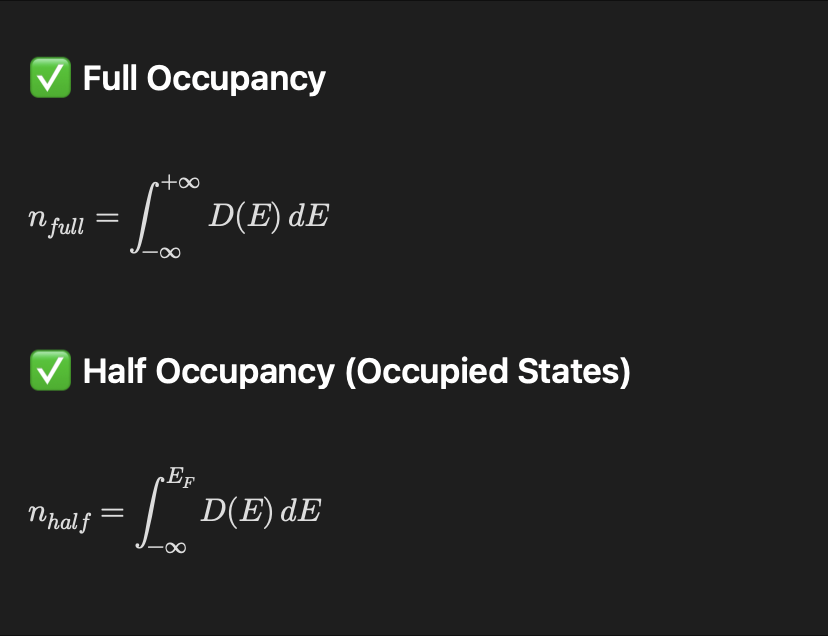

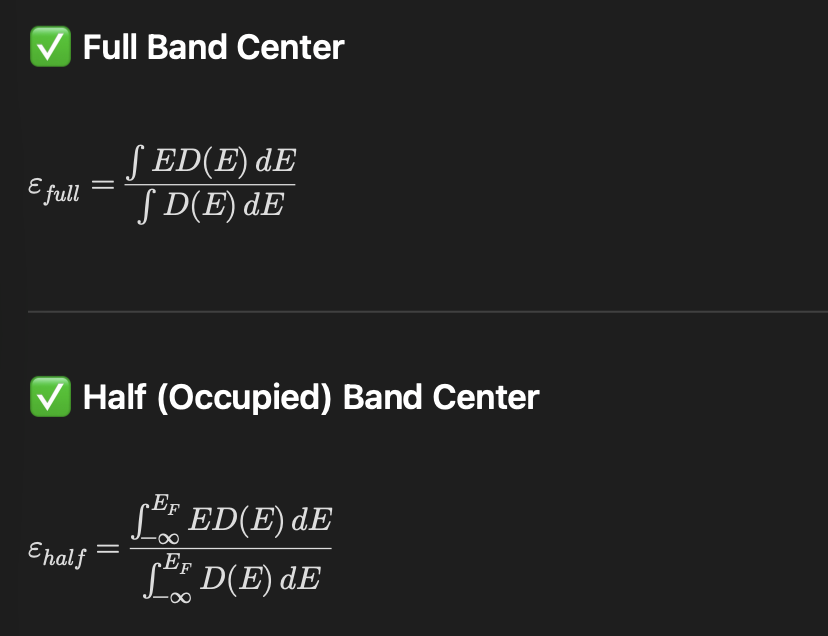

In [9]:
def compute_properties(energy, dos):

    # Full occupancy
    n_full = np.trapezoid(dos, energy)

    #  Half occupancy (E <= 0)
    mask = energy <= 0
    n_half = np.trapezoid(dos[mask], energy[mask])

    # Full band center
    if n_full != 0:
        band_center_full = np.trapezoid(energy * dos, energy) / n_full
    else:
        band_center_full = 0

    #  Half band center
    if n_half != 0:
        band_center_half = np.trapezoid(
            energy[mask] * dos[mask],
            energy[mask]
        ) / n_half
    else:
        band_center_half = 0

    return n_full, n_half, band_center_full, band_center_half

In [10]:
# Use positive DOS for physics
ldos_total = ldos_up + abs(ldos_down)
pz_total = pz_up + abs(pz_down)
px_total = px_up + abs(px_down)
py_total = py_up + abs(py_down)

print("\n TOTAL p")
print(compute_properties(energy, ldos_total))

print("\n pz ")
print(compute_properties(energy, pz_total))

print("\n px ")
print(compute_properties(energy, px_total))

print("\n py")
print(compute_properties(energy, py_total))


 TOTAL p
(np.float64(3.9255049890000002), np.float64(3.0577415345000007), np.float64(-4.930386788528167), np.float64(-7.533281887662929))

 pz 
(np.float64(1.7264215366132476), np.float64(0.9876013545267076), np.float64(-0.8895594095188162), np.float64(-4.119791409824845))

 px 
(np.float64(1.0995647591729305), np.float64(1.0351265970318284), np.float64(-8.103918068758844), np.float64(-9.162435356281854))

 py
(np.float64(1.099546360131326), np.float64(1.0350162870309758), np.float64(-8.10130263646043), np.float64(-9.161239998590943))
